In [54]:
import cv2
import os
import PIL
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [55]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [56]:
dataset_url = "E:\Data Trained_ Training\FlipRobo\Image Scraping and Classification Project\Images"
data_dir = origin=dataset_url
data_dir

'E:\\Data Trained_ Training\\FlipRobo\\Image Scraping and Classification Project\\Images'

In [57]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images')

In [58]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans0.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans1.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans10.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans100.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans101.jpg')]

In [59]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1054


In [60]:
Jeans = list(data_dir.glob('Jeans/*'))
Jeans[:5]

[WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans0.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans1.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans10.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans100.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans101.jpg')]

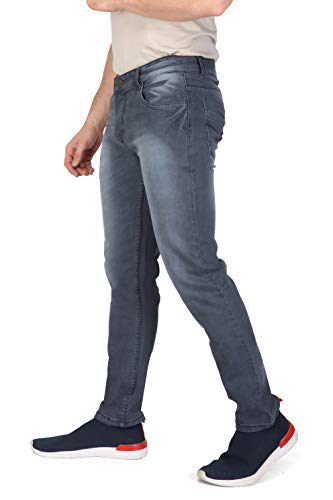

In [61]:
PIL.Image.open(str(Jeans[1]))

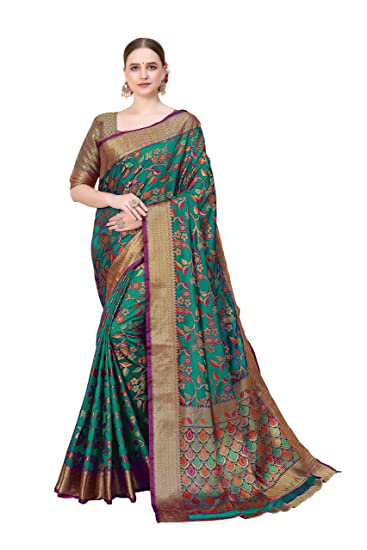

In [62]:
Sarees = list(data_dir.glob('Sarees/*'))
PIL.Image.open(str(Sarees[0]))

In [63]:
flowers_images_dict = {
    'Jeans': list(data_dir.glob('Jeans/*')),
    'Sarees': list(data_dir.glob('Sarees/*')),
    'Trousers': list(data_dir.glob('Trousers/*'))
}

In [64]:
flowers_labels_dict = {
    'Jeans': 0,
    'Sarees': 1,
    'Trousers': 2
}

In [65]:
flowers_images_dict['Jeans'][:5]

[WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans0.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans1.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans10.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans100.jpg'),
 WindowsPath('E:/Data Trained_ Training/FlipRobo/Image Scraping and Classification Project/Images/Jeans/Jeans101.jpg')]

In [66]:
img = cv2.imread(str(flowers_images_dict['Jeans'][0]))

In [67]:
img.shape

(740, 569, 3)

In [68]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [69]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [70]:
X = np.array(X)
y = np.array(y)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [72]:
#(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(790, 180, 180, 3)

In [73]:
X_test.shape

(264, 180, 180, 3)

In [74]:
y_train.shape

(790,)

In [75]:
y_train[:5]

array([0, 2, 0, 0, 2])

In [76]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([0, 2, 0, 0, 2])

In [77]:
y_test = y_test.reshape(-1,)

In [78]:
classes = ["Jeans","Sarees","Trousers"]

In [79]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

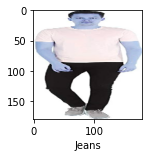

In [80]:
plot_sample(X_train, y_train, 0)

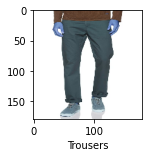

In [81]:
plot_sample(X_train, y_train, 1)

In [82]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [83]:
num_classes = 5
ann = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

ann.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])           
ann.fit(X_train, y_train, epochs=100) 

Epoch 1/100
25/25 [==============================] - 21s 794ms/step - loss: 0.9062 - accuracy: 0.6114
Epoch 2/100
25/25 [==============================] - 21s 826ms/step - loss: 0.4180 - accuracy: 0.8139
Epoch 3/100
25/25 [==============================] - 19s 764ms/step - loss: 0.2634 - accuracy: 0.8848
Epoch 4/100
25/25 [==============================] - 22s 866ms/step - loss: 0.2213 - accuracy: 0.9165
Epoch 5/100
25/25 [==============================] - 21s 830ms/step - loss: 0.1918 - accuracy: 0.9190
Epoch 6/100
25/25 [==============================] - 19s 775ms/step - loss: 0.1474 - accuracy: 0.9392
Epoch 7/100
25/25 [==============================] - 19s 740ms/step - loss: 0.1470 - accuracy: 0.9329
Epoch 8/100
25/25 [==============================] - 21s 838ms/step - loss: 0.0933 - accuracy: 0.9734
Epoch 9/100
25/25 [==============================] - 26s 1s/step - loss: 0.0586 - accuracy: 0.9785
Epoch 10/100
25/25 [==============================] - 27s 1s/step - loss: 0.0365 - ac

25/25 [==============================] - 33s 1s/step - loss: 3.2203e-05 - accuracy: 1.0000
Epoch 80/100
25/25 [==============================] - 23s 887ms/step - loss: 3.1952e-05 - accuracy: 1.0000
Epoch 81/100
25/25 [==============================] - 23s 932ms/step - loss: 3.0302e-05 - accuracy: 1.0000
Epoch 82/100
25/25 [==============================] - 24s 958ms/step - loss: 2.9091e-05 - accuracy: 1.0000
Epoch 83/100
25/25 [==============================] - 35s 1s/step - loss: 2.8299e-05 - accuracy: 1.0000
Epoch 84/100
25/25 [==============================] - 35s 1s/step - loss: 2.7238e-05 - accuracy: 1.0000
Epoch 85/100
25/25 [==============================] - 18s 738ms/step - loss: 2.6607e-05 - accuracy: 1.0000
Epoch 86/100
25/25 [==============================] - 25s 1s/step - loss: 2.6275e-05 - accuracy: 1.0000
Epoch 87/100
25/25 [==============================] - 31s 1s/step - loss: 2.5297e-05 - accuracy: 1.0000
Epoch 88/100
25/25 [==============================] - 30s 1s/step

In [92]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.84      0.77        73
           1       0.96      0.97      0.96        96
           2       0.85      0.74      0.79        95

    accuracy                           0.85       264
   macro avg       0.84      0.85      0.84       264
weighted avg       0.85      0.85      0.85       264



In [93]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)),layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                         layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 26s 1s/step - loss: 2.2944 - accuracy: 0.4848
Epoch 2/10
25/25 [==============================] - 25s 997ms/step - loss: 0.3762 - accuracy: 0.8405
Epoch 3/10
25/25 [==============================] - 25s 1s/step - loss: 0.2503 - accuracy: 0.9101
Epoch 4/10
25/25 [==============================] - 26s 1s/step - loss: 0.1998 - accuracy: 0.9253
Epoch 5/10
25/25 [==============================] - 25s 1s/step - loss: 0.1073 - accuracy: 0.9671
Epoch 6/10
25/25 [==============================] - 27s 1s/step - loss: 0.0788 - accuracy: 0.9772
Epoch 7/10
25/25 [==============================] - 25s 1s/step - loss: 0.0610 - accuracy: 0.9747
Epoch 8/10
25/25 [==============================] - 26s 1s/step - loss: 0.0309 - accuracy: 0.9924
Epoch 9/10
25/25 [==============================] - 26s 1s/step - loss: 0.0170 - accuracy: 0.9987
Epoch 10/10
25/25 [==============================] - 25s 1s/step - loss: 0.0109 - accuracy: 0.9987


In [94]:
cnn.evaluate(X_test,y_test)

9/9 [==============================] - 3s 292ms/step - loss: 0.5546 - accuracy: 0.8561


[0.5546121597290039, 0.8560606241226196]

In [95]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.9966621e-01, 1.5763735e-05, 3.1808979e-04, 5.6553104e-12,
        5.0655917e-11, 3.1100440e-13, 2.1582382e-16, 3.9650263e-14,
        1.4684961e-12, 1.2605177e-13],
       [1.1134964e-04, 6.2068382e-09, 9.9988866e-01, 7.7044661e-16,
        1.8948739e-14, 5.2911616e-15, 3.7892086e-21, 2.5413599e-17,
        1.1718758e-17, 1.6798693e-19],
       [2.6734890e-09, 1.0000000e+00, 1.4465623e-08, 7.7670020e-16,
        3.8266232e-17, 2.6771802e-15, 1.8045149e-19, 1.0477980e-17,
        5.2778403e-15, 1.2388786e-15],
       [1.2633001e-05, 9.9979931e-01, 1.8810939e-04, 6.2960589e-14,
        1.7822813e-14, 7.2580762e-14, 1.6725843e-18, 9.0792085e-16,
        6.7559741e-14, 3.6595144e-15],
       [9.9145269e-01, 5.2499736e-04, 8.0223009e-03, 5.1525895e-10,
        2.8077438e-09, 7.0222286e-11, 1.6108236e-13, 5.8240166e-12,
        1.2866556e-10, 2.9194657e-11]], dtype=float32)

In [96]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 2, 1, 1, 0]

In [97]:
y_test[:5]

array([0, 0, 1, 1, 0])

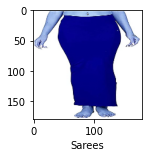

In [98]:
plot_sample(X_test, y_test,3)

In [99]:
classes[y_classes[3]]

'Sarees'

In [111]:
classes[y_classes[261]]

'Trousers'